# **Introduction tosimple probability/combinatorics**

## **Uniform random** 
We want to learn how to generate some random number in an interval from 0 to 1.

In [8]:
import random

# Generate a single random number between 0 and 1
random_number = random.random()
print(random_number)

0.4537675920366019


In [ ]:
# Generate a list of 5 random numbers between 0 and 1
random_numbers = [random.random() for _ in range(5)]
print(random_numbers)

In [ ]:
from manim import *

In [ ]:
%%manim -qm -v WARNING OneDimensionalDistribution1

random_numbers = [random.random() for _ in range(20)]

class OneDimensionalDistribution1(Scene):
    def construct(self):
        # Create a number line from 0 to 1
        number_line = NumberLine(
            x_range=[0, 1, 0.1],  # range from 0 to 1 with ticks every 0.1
            length=10,            # length of the line in scene units
            color=BLUE,           # color of the number line
            include_numbers=True, # show numbers on the line
            label_direction=DOWN, # direction of the labels
        )
        
        # Create uniform distribution points along the number line
        distribution_points = VGroup(
            *[Dot(point=number_line.n2p(x), color=RED) for x in [i for i in random_numbers]]
        )

        # Add number line and distribution points to the scene
        self.play(Create(number_line))
        for dot in distribution_points:
          self.play(FadeIn(dot), run_time=0.1)

        # Wait for a moment to visualize
        self.wait(20)
        

In [ ]:
%%manim -qm -v WARNING OneDimensionalDistribution2

random_numbers = [random.random() for _ in range(700)]

class OneDimensionalDistribution2(Scene):
    def construct(self):
        # Create a number line from 0 to 1
        number_line = NumberLine(
            x_range=[0, 1, 0.1],  # range from 0 to 1 with ticks every 0.1
            length=10,            # length of the line in scene units
            color=BLUE,           # color of the number line
            include_numbers=True, # show numbers on the line
            label_direction=DOWN, # direction of the labels
        )
        
        # Create uniform distribution points along the number line
        distribution_points = VGroup(
            *[Dot(point=number_line.n2p(x), color=RED) for x in [i for i in random_numbers]]
        )

        # Add number line and distribution points to the scene
        self.play(Create(number_line))
        self.play(FadeIn(distribution_points))

        # Wait for a moment to visualize
        self.wait(20)

## **Flip the coin** 

We want to pay a game: simulate a coin flip. If the generated number is smaller than 0.5, we count it as head and if it is bigger, we take it as tail.

In [ ]:
random_number = random.random()
if (random_number < 0.5):
  print ("head")
else:
  print ("tail")

In [ ]:
%%manim -qm -v WARNING CircleWithNumber

random_number = random.random()

if (random_number < 0.5):
  result = 0
else:
  result = 1

class CircleWithNumber(Scene):
    def construct(self):
        # Create a circle
        circle = Circle(radius=1, color=BLUE)  # Adjust the radius and color as needed
        
        # Create a number (as text) to place inside the circle
        number = Text(str(result), font_size=48)  # Adjust the number and font size as needed

        # Position the number at the center of the circle
        number.move_to(circle.get_center())

        # Group the circle and the number together
        circle_with_number = VGroup(circle, number)

        # Add the circle with the number to the scene
        self.play(Create(circle_with_number))

        # Wait to visualize
        self.wait(2)

Let's filp a lot of coins

In [ ]:
random_numbers = [random.random() for _ in range(20)]
for x in random_numbers:
  if (x < 0.5):
    print ("head")
  else:
    print ("tail")

In [ ]:
%%manim -qm -v WARNING RowOfCircles

random_number = random.random()

random_numbers = [random.random() for _ in range(10)]

result = []
for x in random_numbers:
  if (x < 0.5):
    result.append(0)
  else:
    result.append(1)

class RowOfCircles(Scene):
    def construct(self):
        # Create a list to hold the circle-number pairs
        circles_with_numbers = VGroup()
        
        # Set the starting position for the first circle
        start_x = -5  # Adjust for center alignment in the scene
        y_position = 0  # Y position (keeping it constant for horizontal alignment)
        
        # Create 5 circles with numbers and arrange them in a row        
        for i, x in enumerate(result):  # Create 5 circles with numbers 1 to 5            
            # Create a circle
            circle = Circle(radius=0.4, color=BLUE)
            
            # Create a number to place inside the circle
            number = Text(str(x), font_size=17)
            
            # Position the number at the center of the circle
            number.move_to(circle.get_center())
            
            # Group the circle and the number together
            circle_with_number = VGroup(circle, number)
            
            # Set the position of the circle with number
            circle_with_number.move_to([start_x + i , y_position, 0])  # Adjust spacing between circles
            
            # Add the circle with the number to the group
            circles_with_numbers.add(circle_with_number)

        # Add all circles with numbers to the scene
        self.play(Create(circles_with_numbers))
        
        # Wait to visualize
        self.wait(20)

Let's count the number of tails and heads:

In [ ]:
number_of_flips = 200
number_of_heads = 0
number_of_tails = 0

random_numbers = [random.random() for _ in range(number_of_flips)]
for x in random_numbers:
  if (x < 0.5):
    number_of_heads = number_of_heads + 1
  else:
    number_of_tails = number_of_tails + 1
print("number of heads: ", number_of_heads)
print("number of tails: ", number_of_tails)

we also want to count the ratio of heads to tails:

In [ ]:
number_of_flips = 4000000
number_of_heads = 0
number_of_tails = 0

random_numbers = [random.random() for _ in range(number_of_flips)]
for x in random_numbers:
  if (x < 0.5):
    number_of_heads = number_of_heads + 1
  else:
    number_of_tails = number_of_tails + 1
print("number of heads: ", number_of_heads)
print("number of tails: ", number_of_tails)
print("ratio of heads: ", number_of_heads/number_of_flips)
print("ratio of teils: ", number_of_tails/number_of_flips)


We want to check ratio of heads/tails in all experiments:

In [14]:
number_of_flips = 500
number_of_heads = 0
number_of_tails = 0

random_numbers = [random.random() for _ in range(number_of_flips)]
ratio_of_heads = []
ratio_of_tails = []
for i, x in enumerate(random_numbers):
  if (x < 0.5):
    number_of_heads = number_of_heads + 1
  else:
    number_of_tails = number_of_tails + 1
  ratio_of_heads.append(number_of_heads/(i+1))
  ratio_of_tails.append(number_of_tails/(i+1))
print (ratio_of_heads[-1])

0.4998


In [10]:
%%manim -qm -v WARNING TwoGraphsFromArray

class TwoGraphsFromArray(Scene):
    def construct(self):
        # Create the axes for the graph
        axes = Axes(
            x_range=[0, number_of_flips, 30],  # x-axis range from 0 to 10 with a step size of 1
            y_range=[0, 1, 0.1],  # y-axis range from 0 to 10 with a step size of 1
            x_length=7,          # length of the x-axis in scene units
            y_length=5,          # length of the y-axis in scene units
            axis_config={"color": GREY},  # color of the axes
            tips=False,          # disable arrow tips at the ends of axes
        )
        
        # Add labels to the axes
        labels = axes.get_axis_labels(x_label="x", y_label="y")

        # First set of values for the first graph
        x_values_1 = range(number_of_flips)
        y_values_1 = ratio_of_heads

        # Second set of values for the second graph
        x_values_2 = range(number_of_flips)
        y_values_2 = ratio_of_tails

        # Plot the first graph using plot_line_graph
        graph1 = axes.plot_line_graph(
            x_values_1, y_values_1,
            add_vertex_dots=False,  # Adds dots at each point
            line_color=BLUE,       # Color of the line connecting the points
            vertex_dot_style=dict(stroke_width=0.1, fill_opacity=1, color=RED)  # Style of the dots
        )

        # Plot the second graph using plot_line_graph
        graph2 = axes.plot_line_graph(
            x_values_2, y_values_2,
            add_vertex_dots=False,  # Adds dots at each point
            line_color=GREEN,      # Color of the line connecting the points
            vertex_dot_style=dict(stroke_width=0.1, fill_opacity=1, color=YELLOW)  # Style of the dots
        )

        # Add the axes, labels, and both graphs to the scene
        self.play(Create(axes), Write(labels))
        self.play(Create(graph1), Create(graph2))

        # Wait to visualize the graph
        self.wait(20)


UsageError: Cell magic `%%manim` not found.


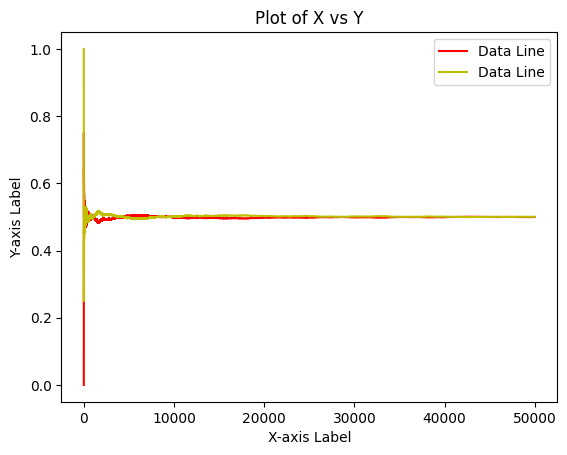

In [15]:
import matplotlib.pyplot as plt

plt.plot(ratio_of_heads, linestyle='-', color='r', label='Heads')
plt.plot(ratio_of_tails, linestyle='-', color='y', label='Tails')

# Adding labels and title
plt.xlabel('Number of experiments')
plt.ylabel('Ratio')
plt.title('Plot of heads vs tails')

# Adding a legend
plt.legend()

# Display the plot
plt.show()